In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("/content/drive/MyDrive/資料探勘/作業2/hw3/Wine Quality Data Set.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_1=scaler.fit_transform(df)
df_2=pd.DataFrame(df_1,columns=df.columns)
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.500000
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.500000
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.500000
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.333333
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.500000
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.666667


In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
Start=time.time()
kMeans=KMeans(n_clusters=3,random_state=0).fit(df_2)
kmlb=kMeans.fit(df_2)
y_kmeans=kmlb.fit_predict(df_2)
End=time.time()
print(y_kmeans)
print(End-Start)

[1 2 2 ... 1 0 0]
1.7771966457366943


In [11]:
kmlb = df_2[y_kmeans== 0].values



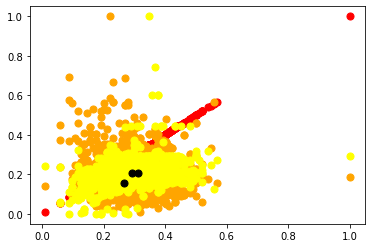

In [12]:
plt.scatter(kmlb[:,0],kmlb[:,0],s=50,c='red')
plt.scatter(kmlb[:,0],kmlb[:,1],s=50,c='orange')
plt.scatter(kmlb[:,0],kmlb[:,2],s=50,c='yellow')
plt.scatter(kMeans.cluster_centers_[:, 0],kMeans.cluster_centers_[:, 1],s=50,c='black')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
len(kmlb)

1497

In [15]:
km_add = df_2
km_add["Cluster"] = y_kmeans
km_add

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.500000,1
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.500000,2
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.500000,2
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000,1
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000,2
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.333333,1
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.500000,1
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.666667,0


In [16]:
km_results = km_add.groupby("Cluster").sum()
km_results

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,434.644231,307.901961,297.493976,82.736196,119.830861,146.101045,361.111369,119.874108,605.881818,409.023256,959.903226,859.166667
1,672.278846,450.250000,446.487952,281.081288,287.540059,285.505226,745.945476,376.385869,793.890909,630.069767,526.924731,867.500000
2,331.764423,193.794118,242.084337,71.249233,127.083086,136.836237,363.032483,156.936669,685.290909,497.779070,499.443011,622.666667


In [17]:
purityList=[]
total=0
for i in range(3):
    purity = km_results.loc[i].max()/km_results.loc[i].sum()
    purityList.append(purity)
    total = total + km_results.loc[i].sum()

print("純度:\n",purityList)
print("總和:\n",total)

純度:
 [0.20407543224383545, 0.1363166353590993, 0.1744648282899709]
總和:
 14995.48907899313


In [18]:
Total_purity=0
for i in range(len(purityList)):
    Total_purity = Total_purity+purityList[i]*(km_results.loc[i].sum()/total)
print("總純度:\n",Total_purity)

總純度:
 0.1675633333237353
